# Real-time carbon accounting and material transition for hydrogen systems

__author__ = "Marco De Sousa"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Marco De Sousa", "Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Marco De Sousa"
__email__ = "marcopdsousa@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a fixed demand of hydrogen on a daily scale while optimizing the production process by using forecasting techniques.

It is important to note that three different hydrogen pathways can be utilized each with their respective emissions.

Hypothesis: By using real-time carbon accounting, decisions and changes can be made in a more dynamic nature.

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
+ \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
- S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
\sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
\forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [39]:
import sys
sys.path.append('../src')

In [40]:
import pandas as pd
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource, Scope
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product
from energiapy.components.result import Result
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.model.constraints.integer_cuts import constraint_block_integer_cut, constraint_block_integer_cut_min
from scipy import stats

## Data Import

In [41]:
horizon = 1

In [42]:
lf = 15

The following data is needed for the model

- Daily demands of hydrogen.
- The capacity factor of renewable energy sources and traditional grid power.


**Declare temporal scale**

The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.



In [43]:
scales = TemporalScale(discretization_list=[1,365,24])

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [44]:
bigM = 10**7
smallM = 0.001

Historical Data for Design - Hourly Wind Availability

In [45]:
def load_data(loc: str, index: list):
    df = pd.read_csv(f'C:/Users/marcopdsousa/Documents/energiapy/data/{loc}_solar19.csv')
    df['idx'] = index
    df = df.set_index('idx')
    return df
idx = [(i, j, k) for i, j, k in product(range(1), range(365), range(24))]

In [46]:
weather_ho = load_data('ho', idx)[['dni']]

In [47]:
coord_houston = (29.56999969482422, -95.05999755859375)
weather_houston = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/data/weather_houston.csv', index_col=0)
weather_houston.index = pd.to_datetime(weather_houston.index, utc = True)

C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_43100\953918276.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_houston.index = pd.to_datetime(weather_houston.index, utc = True)


In [48]:
# I do not understand this block of code very well, how does the hub height, obersvation height, and roughness length relate to the wind speed model?


wind_houston = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'V100/1800', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = True, obstacle_height = 0, 
                                 observation_height = 10)

solar_houston = solar_power_output(data= weather_houston, coord=coord_houston, sam = 'cecmod', module_params= 'Canadian_Solar_Inc__CS5P_220M', 
                                   inverter = 'cecinverter', inverter_params= 'ABB__MICRO_0_25_I_OUTD_US_208__208V_', 
                                   temperature_params= 'open_rack_glass_glass', aoi_model= 'no_loss', ac_model= 'sandia', spectral_model= 'no_loss')

In [49]:
# # wfdf1 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2021 Wind and Solar data.xlsx", sheet_name='Wind Data')  # None reads all sheets
# # wfdf1 = wfdf1['ERCOT.WIND.GEN']

# # wfdf2 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2022 Wind and Solar data.xlsx", sheet_name='Wind Data')  # None reads all sheets
# # wfdf2 = wfdf2['ERCOT.WIND.GEN']

# wfdf3 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2023 Wind and Solar data.xlsx", sheet_name='Wind Data')  # None reads all sheets
# wfdf3 = wfdf3['ERCOT.WIND.GEN']
# wfdf3

# wfcombined_df = pd.concat([wfdf3], axis=0)  # axis=0 means row-wise (default)
# wfcombined_df = pd.DataFrame(wfcombined_df)
# #wfdf1, wfdf2, 
# wfcombined_df[:24]


Historical Data for Design - Hourly Solar Availability

In [50]:
# # sfdf1 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2021 Wind and Solar data.xlsx", sheet_name='Solar Data')  # None reads all sheets
# # sfdf1 = sfdf1['ERCOT.PVGR.GEN']

# # sfdf2 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2022 Wind and Solar data.xlsx", sheet_name='Solar Data')  # None reads all sheets
# # sfdf2 = sfdf2['ERCOT.PVGR.GEN']

# sfdf3 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2023 Wind and Solar data.xlsx", sheet_name='Solar Data')  # None reads all sheets
# sfdf3 = sfdf3['PV_Final']
# sfcombined_df = pd.concat([sfdf3], axis=0)  # axis=0 means row-wise (default)
# sfcombined_df = pd.DataFrame(sfcombined_df)
# sfcombined_df[:24]
# #sfdf1, sfdf2, 

In [51]:
# #Gives relevancy to price values again
# wfcombined = wfcombined_df.max()
# sfcombined = sfcombined_df.max()

## Declare Resources

In [52]:
Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power')
# , price= 52.69, gwp=0, scope=Scope.TWO)

Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power')
# , price= 60.11, gwp=0, scope=Scope.TWO)

Power = Resource(name='Power', basis='MW',
                 label='Power generated')

LiIPower = Resource(name='LiIPower', basis='MW',  store_max=bigM, label='Power bought')

# GridPower = Resource(name='GridPower', basis='MW',
#                      cons_max=bigM, label='Power bought', gwp= 353.83, price =ecombined ,varying = [VaryingResource.DETERMINISTIC_PRICE], scope = Scope.TWO)


Steam = Resource(name='Steam', basis='tons', cons_max=bigM, label='Steam')

CW = Resource(name='Cooling water', cons_max=10**10, price=0.001, basis='tons', label='Cooling water', block='Resource')

CO2 = Resource(name='CO2', basis='tons', label='Carbon dioxide', block='Resource')

CO2_air = Resource(name='CO2_air', basis='tons', label='Carbon dioxide', block='Resource', cons_max = bigM)

# Why is the GWP for CO2 1000?
CO2_Vent = Resource(name='CO2_Vent', sell=True, basis='tons', label='Carbon dioxide', gwp = 1000)

H2O = Resource(name='H2O', cons_max=10**10, price=1.8494, basis='tons', label='Water', block='Resource')
#7 usd/(1000 gal= 3785 kg) #https://waterinfo.murphytx.org/fees/rates/

Chlorine = Resource(name='Chlorine', cons_max=10**10, price=660, basis='tons', label='Chlorine', block='Resource')
#0.66/kg https://businessanalytiq.com/procurementanalytics/index/chlorine-price-index/

Air = Resource(name='Air', cons_max=10**10, price=0, basis='tons', label='Air', block='Resource')
#7 usd/(1000 gal= 3785 kg) #https://waterinfo.murphytx.org/fees/rates/

#Prices - Here we can feed deterministic prices for NG
NG = Resource(name='Natural Gas', price=128.81, basis='ton', cons_max=bigM, label='Natural Gas', gwp = 1249.181)

#Why is there a specific cons_max for oil?
Oil = Resource(name='Oil', price=572.166, basis='ton', cons_max=7162.30, label='Oil', gwp = 1558.187)

O2 = Resource(name='Oxygen', price=230, cons_max=10**10, basis='tons', label='Oxygen', gwp =183.1, block='Resource')
#https://medium.com/intratec-products-blog/oxygen-prices-latest-historical-data-in-several-countries-b180fad7dafa (usd/ton)
#http://www.leonland.de/elements_by_price/en/list (Praxair, $640)
#https://www.chemanalyst.com/Pricing-data/oxygen-1575#:~:text=Oxygen%20prices%20for%20Q1%202024,at%20USD%20230%20per%20MT($230).
#https://www.imarcgroup.com/oxygen-pricing-report
#O2 = Resource(name='Oxygen', cons_max=10**10, basis='tons', label='Oxygen', gwp =28.7316, block='Resource')
#ASU cryogenic distillation

#From SMR+CCS HYDROGEN (92% capture)
H2 = Resource(name='Hydrogen', price= 6700, cons_max=10**10, basis='tons', label='Hydrogen', gwp = 2500, block='Resource')
#https://www.statista.com/statistics/1179498/us-hydrogen-production-costs-forecast/ (usd/ton)
#https://www.frompollutiontosolution.org/hydrogen-from-smr-and-ccs


#Do none of the resources below have gwp's?

Methanol = Resource(name='Methanol', basis='tons', label='Methanol')

Methane = Resource(name='Methane', basis='tons', label='Methane')

Ethylene = Resource(name='Ethylene', basis='tons', label='Ethylene')

Propylene = Resource(name='Propylene', basis='tons', label='Propylene', sell= True)

C4_frac = Resource(name='C4 fraction', basis='tons', label='C4 fraction', sell= True)

LPG = Resource(name='LPG', basis='tons', label='LPG', sell= True, gwp = 937)

C5_frac = Resource(name='C5 fraction', basis='tons', label='C5 fraction', sell= True)

#POLYMERS

HDPE = Resource(name='High density polyethylene', basis='tons', label='HDPE')

HDPE_CM = Resource(name='HDPE_CM', basis='tons', label='HDPE')

HDPE_E = Resource(name='HDPE_E', basis='tons', label='HDPE')

HDPE_IM = Resource(name='HDPE_IM', basis='tons', label='HDPE')


#PLASTICS THAT ONLY BAU ROUTE IS DEFINED

NMC = Resource(name='NMC', basis='tons', label='NMC')
Battery = Resource(name='Battery', basis='tons', label='Battery')
Gasoline = Resource(name='Gasoline', basis='tons', label='Gasoline')
ICE = Resource(name='ICE', basis='unit', label='ICE')
EV = Resource(name='EV', basis='unit', label='EV')
Miles = Resource(name='Miles', basis='unit', label='Miles', demand = True)


#Both Charging stations are net zero? The fuel charging station is not used at all
EC = Resource(name= 'Electric charging station', gwp = 0)


## Declare Materials

Materials are utilized for the establishment of processes. Materials inturn require resources to be set up. 

In [53]:
#These two are derived from the carbonate versions, there are two hydroxide versions as well - FUTURE WORK
#Ah I remember this IEA document 
LiR = Material(name='LiR', gwp=9600, basis='kg CO2 eq./ton', label='Rock-based Lithium',
               citation='https://www.iea.org/data-and-statistics/charts/ghg-emissions-intensity-for-lithium-by-resource-type-and-processing-route')  
LiB = Material(name='LiB', gwp=2800, basis='kg CO2 eq./ton', label='Brine-based Lithium',
               citation='https://www.iea.org/data-and-statistics/charts/ghg-emissions-intensity-for-lithium-by-resource-type-and-processing-route')
Inverter = Material(name = 'Inverter', gwp = 4041, basis = 'kg CO2 eq./ton', label = 'copper',
                 citation = 'GREET 2022, Glass fiber reinforced plastic') 

#https://onlinelibrary.wiley.com/doi/full/10.1002/ente.201800037#:~:text=It%20is%20well%20established%20that,53%20g%20CO2%20eq.

Steel = Material(name ='steel', gwp= 2121.152427, basis='kg CO2 eq./ton', label = 'Steel', 
                 citation= 'Annika Eberle et al., (2023), Materials used in U.S. Wind Energy Technologies: Quanitities and Availability for Two Future Scenarios')

Cast_iron = Material(name ='cast iron', gwp= 1759.710573, basis='kg CO2 eq./ton', label = 'Cast iron', 
                 citation= 'Annika Eberle et al., (2023), Materials used in U.S. Wind Energy Technologies: Quanitities and Availability for Two Future Scenarios')

Concrete = Material(name ='concrete', gwp= 120.0378, basis='kg CO2 eq./ton', label = 'Concrete', 
                 citation= 'Annika Eberle et al., (2023), Materials used in U.S. Wind Energy Technologies: Quanitities and Availability for Two Future Scenarios')

Glass = Material(name = 'glass', gwp = 1118.5, basis = 'kg CO2 eq./ton', label = 'glass',
                 citation = 'Statista.com/statistics/1118670/materials-used-manufacture-solar-pv-plant-globally. & https://solaredition.com/raw-materials-breakdown-for-building-a-1-megawatt-solar-photovoltaic-plant-2017')

Aluminium = Material(name = 'aluminium', gwp = 16707.00, basis = 'kg CO2 eq./ton', label = 'aluminium',
                 citation = 'https://www.researchgate.net/figure/Overall-environmental-impact-per-kg-Pts-kg-and-GWP-kg-of-CO2-eq-kg-aluminium-of_fig2_295243557. & Statista.com/statistics/1118670/materials-used-manufacture-solar-pv-plant-globally. & https://solaredition.com/raw-materials-breakdown-for-building-a-1-megawatt-solar-photovoltaic-plant-2017')

Silicon_mono = Material(name = 'silicon', gwp = 122239.1, basis = 'kg CO2 eq./ton', label = 'silicon',
                 citation = 'Statista.com/statistics/1118670/materials-used-manufacture-solar-pv-plant-globally. & https://solaredition.com/raw-materials-breakdown-for-building-a-1-megawatt-solar-photovoltaic-plant-2017')

Silicon_poly = Material(name = 'silicon', gwp = 98646.7, basis = 'kg CO2 eq./ton', label = 'silicon',
                 citation = 'Statista.com/statistics/1118670/materials-used-manufacture-solar-pv-plant-globally. & https://solaredition.com/raw-materials-breakdown-for-building-a-1-megawatt-solar-photovoltaic-plant-2017')

Copper = Material(name = 'copper', gwp = 8660.4, basis = 'kg CO2 eq./ton', label = 'copper',
                 citation = 'Statista.com/statistics/1118670/materials-used-manufacture-solar-pv-plant-globally. & https://solaredition.com/raw-materials-breakdown-for-building-a-1-megawatt-solar-photovoltaic-plant-2017')

Epoxy_resin = Material(name = 'epoxy resin', gwp = 5508.8, basis = 'kg CO2 eq./ton', label = 'epoxy resin',
                 citation = 'Statista.com/statistics/1118670/materials-used-manufacture-solar-pv-plant-globally. & https://solaredition.com/raw-materials-breakdown-for-building-a-1-megawatt-solar-photovoltaic-plant-2017')

Glass_fiber = Material(name = 'glass fiber', gwp = 4041, basis = 'kg CO2 eq./ton', label = 'glass fiber',
                 citation = 'GREET 2022, Glass fiber reinforced plastic')

Dummy = Material(name= 'Dummy', gwp = 0)

## Declare Processes

In [54]:

LiIB = Process(name='LiIB', conversion= {Power: -1, LiIPower: 1}, 
              material_cons={LiB: 0.137, Copper: 0.6497, Steel: 1.165},
               capex= 1938204,fopex=44247, vopex=0, prod_min=smallM, prod_max=bigM, label='Lithium-ion battery', basis='MW')
#https://atb.nrel.gov/electricity/2023/utility-scale_battery_storage#

LiIR = Process(name='LiIR', conversion={Power: -1, LiIPower: 1},
               material_cons={LiR: 0.137, Copper: 0.6497, Steel: 1.165},
               capex=1938204, fopex=44247, vopex=0, prod_min=smallM, prod_max=bigM, label='Lithium-ion battery', basis='MW')

LiI_discharge = Process(name='LiI_d', conversion={Power: 0.8, LiIPower: -1},
                        capex=0, fopex=0, vopex=0, prod_max=bigM, prod_min=smallM,  
                        label='Lithium-ion battery (d)', basis='MW', material_cons= {Dummy: 0})

#PV_Monocrystalline is used

PV = Process(name='PV', conversion={Solar: -5, Power: 1}, 
              capex= 1289507, fopex=20988, vopex=0,
              material_cons={Glass: 70, Steel: 56, Concrete: 48, Aluminium: 19, Silicon_mono: 7, Copper: 7}, prod_min=0, prod_max=0, varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW', block = 'power')

#WF Land form is used

WF = Process(name='WF', conversion={Wind: -2.857, Power: 1}, 
             capex=1292000, fopex=29200, vopex= 0,
             material_cons={Steel: 109.9, Cast_iron: 8.805, Concrete: 398.7, Epoxy_resin: 5, Glass_fiber: 12.2}, prod_min=smallM, prod_max=bigM, varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Wind farm', basis='MW', block = 'power')



HDPE_BAU = Process(name='HDPE BAU', 
              conversion={Power: -0.320, NG: -0.8581, Oil: -0.1756, HDPE: 1, CO2_Vent:0.457},
              material_cons={Dummy: 5},
              capex=12260000, fopex=2201.85, vopex=0,  
              prod_min=0.01, prod_max=bigM, label='HDPE production BAU', block='olefins_prod')



CM_HDPE = Process(name='Compression molding', 
              conversion={Power: -0.420, HDPE: -1, HDPE_CM: 1, CO2_Vent:1.6527-1.0578},
              material_cons={Dummy: 5},
              capex=0, fopex=0, vopex=0,  
              prod_min=smallM, prod_max=bigM, label='HDPE CM', block='finishing')

E_HDPE = Process(name='Extrusion', 
              conversion={Power: -0.540, HDPE: -1.002, HDPE_E: 1, CO2_Vent:1.2394-1.0578},
              material_cons={Dummy: 5},
              capex=0, fopex=0, vopex=0,  
              prod_min=smallM, prod_max=bigM, label='HDPE E', block='finishing')

IM_HDPE = Process(name='Injection molding', 
              conversion={Power: -2.10, HDPE: -1.139, HDPE_IM: 1, CO2_Vent:1.9351-1.0578},
              material_cons={Dummy: 5},
              capex=0, fopex=0, vopex=0,  
              prod_min=smallM, prod_max=bigM, label='HDPE IM', block='finishing')

NMC_production = Process(name='NMC production', 
              conversion={Power: -43.055, NMC:1, CO2_Vent:11}, 
              material_cons={Dummy: 5},
              capex=0, fopex=0, vopex=0,  
              prod_min=smallM, prod_max=bigM, label='NMC production', block='NMC production')

Battery_production = Process(name='Battery production', 
              conversion={Power:-0.293, NMC:-0.2504, Battery:1}, 
              material_cons={Dummy: 5},
              capex=0, fopex=0, vopex=0,  
              prod_min=smallM, prod_max=bigM, label='Battery production', block='Battery production')


Gasoline_production = Process(name='Gasoline production', conversion={Oil: -0.00556, Gasoline: 1}, 
                              capex=0, fopex=0, vopex=0, prod_min=smallM, prod_max=bigM, label='Gasoline Production', basis='gallons', material_cons={Dummy: 5}, block = 'gasoline_prod')

#FIX ALL DEMANDS IN A CAR [TON]
ICE_production = Process(name='ICE_prod', conversion={HDPE_CM: -0.0437664, HDPE_E: -0.0166944, HDPE_IM: -0.1200192, ICE: 1, CO2_Vent:3.7}, 
                         capex=0, fopex=0, vopex=22627, prod_min=0, prod_max=bigM, label='ICE_prod', basis='car', material_cons={Dummy: 5}, block = 'ICE_prod')
#Steel1:-923, Aluminium1:-208, Cast_iron1:-143,

#FIX ALL DEMANDS IN A CAR [TON]
EV_production = Process(name='EV_prod', conversion={EC:-1/35.17, HDPE_CM: -0.0437664, HDPE_E: -0.0166944, HDPE_IM: -0.1200192, Battery:-0.7711, EV: 1, CO2_Vent:3.3}, 
                        capex=0,fopex=0, vopex=31895, prod_min=0, prod_max=bigM, label='EV_prod', basis='car', material_cons={Dummy: 5}, block = 'EV_prod')


EC_station = Process(name='Electric Charging station', conversion={HDPE:-0.029, EC:1}, 
                     capex=0,fopex=0, vopex=0, prod_min=smallM, prod_max=bigM, label='Electric Charging station', basis='stations/EV', material_cons={Dummy: 5}, block = 'EV_drive')

Driving1 = Process(name='Driving1', conversion={ICE:(-1/lf)/16171, Gasoline:-539/16171, Miles:1}, 
                   capex=0, fopex=0, vopex=0, prod_min=smallM, prod_max=bigM, label='Driving1', basis='miles/year', material_cons={Dummy: 5}, block = 'ICE_drive')

Driving2 = Process(name='Driving2', conversion={EV:(-1/lf)/16171, Power: -5.6/16171, Miles:1}, 
                   capex=0,fopex=0, vopex=0, prod_min=smallM, prod_max=bigM, label='Driving2', basis='miles/year', material_cons={Dummy: 5}, block = 'EV_drive')


## Declare Location

In [55]:
# pd.DataFrame(ecombined_df)

In [56]:
# process_set = {Grid, PV, WF, SMR, PEM,SMRCCS, ATR_CCS_R, ATR_CCS_R_OC, AWE}#, SMRCCS, PEM} #Grid,  ATR_CCS_OC,


process_set = {PV, WF, LiIR, LiIB, LiI_discharge, HDPE_BAU, CM_HDPE, E_HDPE, IM_HDPE, Battery_production, NMC_production, EV_production, Gasoline_production, ICE_production, Driving1, Driving2, EC_station}
#process_set = {PV, WF, PEM, AWE}#, SMRCCS, PEM} #Grid,  ATR_CCS_OC,

# process_set = {Grid, PV, WF, SMR, AWE}#, SMRCCS, PEM} #Grid,

# process_set = {Grid, PV, WF, SMR, SMRCCS, ATR_CCS_OC, ATR_CCS_R, ATR_CCS_R_OC}#, SMRCCS, PEM} #Grid,

In [57]:
houston = Location(name='HO', processes=process_set, capacity_factor={PV: weather_ho, WF: wind_houston[:8760*horizon]}, 
                   scales=scales, label='Houston', demand_scale_level=2, price_scale_level=2, capacity_scale_level=2, gwp_scale_level = 2)

#, NG: NG_price_hourly expenditure_scale_level=0, , price_factor={GridPower: ecombined_df, NG: NG_price_hourly

#wfcombined_df

## Declare Scenario

In [58]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=0, demand_scale_level=2, 
                    purchase_scale_level = 2, scheduling_scale_level=2, network_scale_level=0, capacity_scale_level=2, gwp_scale_level = 2,
                    label='full_case', demand={houston: {Miles:26149807.8179865*16171/(365*24)}})

#, annualization_factor = 1/25

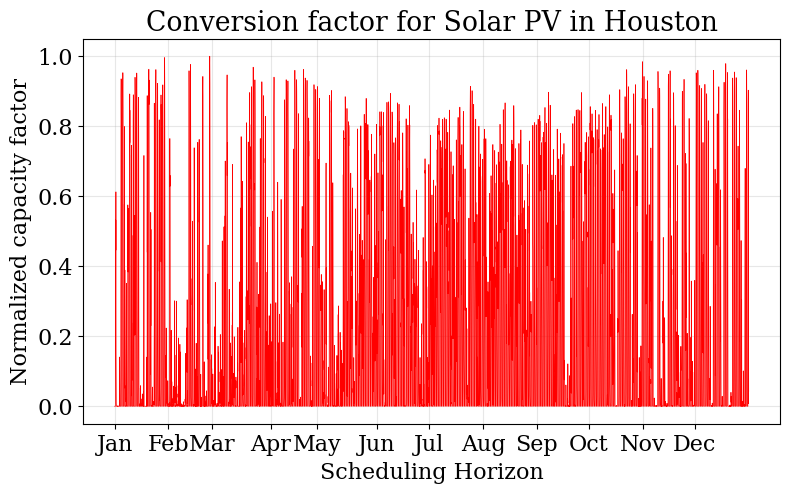

In [59]:
plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=PV, fig_size=(9, 5), color='red')

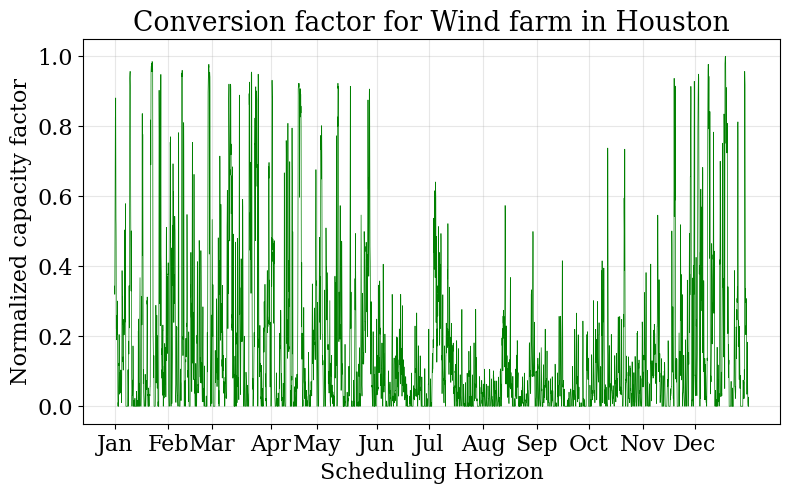

In [60]:
plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=WF, fig_size=(9, 5), color='green')

## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

In [61]:
milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.NETWORK, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION, Constraints.MATERIAL}, objective=Objective.COST, demand_sign = 'geq')

constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential material
constraint global warming potential material mode
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint material process
constraint material location
constraint material network
constraint production facility material mode
constraint production facility material mode binary
constraint production

In [62]:
results_cost = solve(scenario=scenario, instance=milp_cost,
                     solver='gurobi', name=f"res_cost", print_solversteps=True, saveformat = '.pkl')


Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Non-default parameters:
QCPDual  1

Optimize a model with 903039 rows, 5519499 columns and 2389124 nonzeros
Model fingerprint: 0xd18e8197
Variable types: 5519464 continuous, 35 integer (35 binary)
Coefficient statistics:
  Matrix range     [4e-06, 1e+07]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+03, 5e+07]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 591471 rows and 5278056 columns
Presolve time: 0.49s

Explored 0 nodes (0 simplex iterations) in 0.89 seconds (1.44 work units)
Thread count was 1 (of 24 available processors)

Solution count 0

Model is in

  - termination condition: infeasible
  - message from solver: <undefined>


In [ ]:
x = results_cost.output['P']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(174,175) for i in range(24)]

# Plotting the data
plt.plot(time_labels, [x['HO', 'SMR', 0, day, hour] for day in range(174,175) for hour in range(24)], color='maroon', label="SMR Production")
# plt.plot(time_labels, [x['HO', 'SMR', 0, day, hour] for day in range(174,175) for hour in range(24)], color='red', linestyle='--', label="PV")
# plt.plot(time_labels, [x['HO', 'PEM', 0, day, hour] for day in range(174,175) for hour in range(24)], color='g', linestyle=':', label="WF")


# Labeling axes
plt.xlabel('Time')
plt.ylabel('Total Electricity Consumed [MWh]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format %D::%H:%M
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(74,75) for i in range(24)]
#SMRplot = [x['HO', 'SMR', 0, day, hour] for day in range(74,75) for hour in range(24)]
SMRplot = [x['HO', 'SMR', 0, day, hour] for day in range(74,75) for hour in range(24)]
# Plotting the data
plt.fill_between(time_labels, SMRplot, color= 'b', alpha=0.1)
plt.plot(time_labels, [x['HO', 'SMR', 0, day, hour] for day in range(74,75) for hour in range(24)], color='b', label="Hydrogen production on the cloudiest day of the year")
#plt.plot(time_labels, SMRplot, color='orange', linestyle='--', label="Hydrogen production on the sunniest day of the year")
# plt.plot(time_labels, [x['HO', 'WF', 0, day, hour] for day in range(74,75) for hour in range(24)], color='g', linestyle=':', label="WF")

# Labeling axes
plt.xlabel('Time')
plt.ylabel('Hourly Hydrogen Production [kg]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format %D::%H:%M
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(174,175) for i in range(24)]
#SMRplot = [x['HO', 'SMR', 0, day, hour] for day in range(74,75) for hour in range(24)]
#SMRplot = [x['HO', 'SMR', 0, day, hour] for day in range(174,175) for hour in range(24)]
plt.fill_between(time_labels, SMRplot, color= 'maroon', alpha=0.1)
# Plotting the data
# plt.plot(time_labels, [x['HO', 'Grid', 0, day, hour] for day in range(174,175) for hour in range(24)], color='purple', label="Grid"), label="Hydrogen production when there is abundant renewable energy"
plt.plot(time_labels, SMRplot, color='maroon', linestyle='--', label = 'SMR')#, label = "Hydrogen production rate")
# plt.plot(time_labels, [x['HO', 'WF', 0, day, hour] for day in range(174,175) for hour in range(24)], color='g', linestyle=':', label="WF")
# plt.plot(time_labels, [x['HO', 'PV', 0, day, hour] for day in range(174,175) for hour in range(24)], color='red', linestyle='--', label="PV")


# Labeling axes
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Hourly Hydrogen Production [kg]', fontsize = 14)

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D')  # Hour:Minute format %D::%H:%M
# plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Show one tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend(fontsize = 10)

# Show the plot
plt.show()

In [ ]:
# results_cost.output['P']

In [ ]:
results_cost.output['objective']

In [ ]:
111735572.95121007/(200000*365)

In [ ]:
results_cost.output['global_warming_potential_material']

In [ ]:
results_cost.output['global_warming_potential_location']

In [ ]:
940464990.9071429/(200000*365)

In [ ]:
results_cost.output['X_P']

In [ ]:
results_cost.output['Cap_P']

In [ ]:
# gwp = {i: i.gwp for  i in WF.material_cons}
# mat = WF.material_cons

In [ ]:
# mul = {i: gwp[i]*mat[i] for i in gwp}

In [ ]:
# sum(list(mul.values()))*300/25 

In [ ]:
results_cost.output['global_warming_potential_location']

In [ ]:
results_cost.output['global_warming_potential_material']

In [ ]:
# results_cost.output['Capex_process']

In [ ]:
# plot_results.schedule(results = results_cost, y_axis= 'S', component = 'Pure Hydrogen', location='HO')

In [ ]:
# plot_results.schedule(results = results_cost, y_axis= 'P', component = 'Grid', location='HO')

In [ ]:
from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction

In [ ]:
from pyomo.environ import Var, Binary



    # milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMR', i[0]])

# #ramping_limitz = 2000


# milp_cost.cons6 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_cost.cons6.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] - milp_cost.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])

# milp_cost.cons7 = ConstraintList()
# for i in scales.scale_iter(2):
#     if i != (0,0,0):
#         milp_cost.cons7.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] - milp_cost.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])        


# Minimum production rate
# milp_cost.cons1 = ConstraintList()
# for i in scales.scale_iter(1):
#  milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

# Add binary variables for on/off control
# milp_cost.on_smr = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for SMR system
# milp_cost.on_atr_ccs_r = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R system
# milp_cost.on_atr_ccs_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_OC system
# milp_cost.on_atr_ccs_r_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R_OC system




#if i != (0,0):

# milp_cost.cons12 = ConstraintList()
# for i in scales.scale_iter(2):
#     #if i != (0,0):
#     milp_cost.cons12.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] >= 0.2*milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]]) #20% of max production rate

#if i != (0,0):

# For SMR

#if i != (0, 0):
# Force production to zero if the system is off (on_smr == 0)

# For ATR_CCS_R


#if i != (0, 0):
# Force production to zero if the system is off (on_atr_ccs_r == 0)

# # For ATR_CCS_OC
# milp_cost.cons16 = ConstraintList()
# for i in scales.scale_iter(2):
#     #if i != (0, 0):
#     # Force production to zero if the system is off (on_atr_ccs_oc == 0)
#     milp_cost.cons16.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] <= milp_cost.Cap_P['HO','ATR_CCS_OC', i[0]])

# For ATR_CCS_R_OC

#if i != (0, 0):
# Force production to zero if the system is off (on_atr_ccs_r_oc == 0)

def modeler(gwp_pct: float):
    gwp_eval = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION, Constraints.NETWORK,
                        Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION, Constraints.MATERIAL}, objective=Objective.COST, demand_sign = 'geq')
    gwp_eval.cons2 = ConstraintList()
    gwp_eval.cons3 = ConstraintList()
    gwp_eval.cons4 = ConstraintList()
    gwp_eval.cons5 = ConstraintList()
    gwp_eval.cons8 = ConstraintList()
    gwp_eval.cons9 = ConstraintList()
    gwp_eval.cons10 = ConstraintList()
    gwp_eval.cons11 = ConstraintList()
    gwp_eval.cons13 = ConstraintList()
    gwp_eval.cons14 = ConstraintList()
    gwp_eval.cons15 = ConstraintList()
    gwp_eval.cons17 = ConstraintList()

    for i in scales.scale_iter(2):
        gwp_eval.cons10.add(expr = gwp_eval.P['HO', 'SMR', *i] >= 0.3*gwp_eval.Cap_P['HO','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]
        gwp_eval.cons11.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] >= 0.2*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]]) #20% of max production rate
        gwp_eval.cons13.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] >= 0.2*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]]) #20% of max production rate
        gwp_eval.cons14.add(expr = gwp_eval.P['HO', 'SMR', *i] <=gwp_eval.Cap_P['HO','SMR', i[0]])
        gwp_eval.cons15.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] <= gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
        gwp_eval.cons17.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] <= gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])
        if i != (0,0,0):
            gwp_eval.cons2.add(expr = gwp_eval.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
            gwp_eval.cons3.add(expr = gwp_eval.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
            gwp_eval.cons4.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] - gwp_eval.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
            gwp_eval.cons5.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] - gwp_eval.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
            gwp_eval.cons8.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] - gwp_eval.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])
            gwp_eval.cons9.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] - gwp_eval.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])


    constraint_global_warming_potential_network_reduction(instance= gwp_eval, network_scale_level = 0, gwp_reduction_pct = gwp_pct, gwp = results_cost.output['global_warming_potential_network'][0])
    
    return gwp_eval

In [ ]:
models = [modeler((i+1)*10) for i in range(10)]

In [ ]:
# def solver(instance, i): 
#     return solve(scenario=scenario, instance=instance,
#                      solver='gurobi', name=f"res_red/res_red_{i}", print_solversteps=True, saveformat = '.pkl')

In [ ]:
import os

# Create the 'res_red' directory if it doesn't exist
os.makedirs('res_red', exist_ok=True)

def solver(instance, i): 
    return solve(
        scenario=scenario, 
        instance=instance,
        solver='gurobi', 
        name=f"res_red/res_red_{i}", 
        print_solversteps=True, 
        saveformat='.pkl'
    )

# Assuming 'models' is a list of instances to be solved
results = {i: solver(m, i) for i, m in enumerate(models)}


In [ ]:
# results = {i: solver(m,i) for i,m in enumerate(models)}

In [ ]:
for i in range(len(models)):
    print(results[i].output['termination'])

In [ ]:
cost = [None for i in range(len(results))]
gwp_study = [None for i in range(len(results))]
gwpm_study = [None for i in range(len(results))]
prod_study = [None for i in range(len(results))]


for gwp_red, result in results.items():

    if result.output['termination'] == 'optimal':
        cost[gwp_red] = result.output['objective']
        gwp_study[gwp_red] = result.output['global_warming_potential_location']['HO', 0]
        gwpm_study[gwp_red] = result.output['global_warming_potential_material']
        prod_study[gwp_red] = result.output['P']

#print(type(gwp_study[0]))

plt.plot(cost, gwp_study, color='blue', linestyle='--', alpha=0.5)

plt.xlabel('Total Cost of Hydrogen Production [USD]')
plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)
# gwp_study[0]

In [ ]:
196095904.32489505/(200000*365)

In [ ]:
304555211.5247123/(200000*365)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(174,175) for i in range(24)]

# Plotting the data
plt.plot(time_labels, [prod_study[7]['HO', 'SMRCCS', 0, day, hour] for day in range(174,175) for hour in range(24)], color='blue', label="SMRCCS")
plt.plot(time_labels, [prod_study[7]['HO', 'PEM', 0, day, hour] for day in range(174,175) for hour in range(24)], color='green', linestyle='--', label="PEM")
plt.plot(time_labels, [prod_study[7]['HO', 'AWE', 0, day, hour] for day in range(174,175) for hour in range(24)], color='purple', linestyle=':', label="AWE")


# Labeling axes
plt.xlabel('Time')
plt.ylabel('Hourly Hydrogen Production [kg]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format %D:%H:%M
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
200000*365


10% Reduction scenario

In [ ]:
import pickle
data = [pickle.load(open(f'res_red/res_red_{i}.pkl','rb')) for i in range(9)]

In [ ]:
gwp = [data[i]['output']['global_warming_potential_network'] for i in range(8)]
cost = [data[i]['output']['objective'] for i in range(8)]

In [ ]:
test = pickle.load(open(f'res_red/res_red_6.pkl','rb'))

In [ ]:
test['output']['global_warming_potential_material']

In [ ]:
test['output']['objective']

In [ ]:
test['output']['global_warming_potential_material']

In [ ]:
2994.1382395718174+1632.9517222916115+156.7113953925191+4082880.111588101 + 244288572.0237259 #Scope 3 Emissions

In [ ]:
248376235.93667126+70094.88867814424+33693166.4467999

In [ ]:
a = {i:j for i,j in test['output']['global_warming_potential_resource_consumption'].items() if i[1] == 'GridPower'}

In [ ]:
b = {i:j for i,j in test['output']['global_warming_potential_resource_discharge'].items() if i[1] == 'CO2 to Stack' }

In [ ]:
c = {i:j for i,j in test['output']['global_warming_potential_resource_discharge'].items() if i[1] == 'CO2 Vented from the process' }

In [ ]:
ng = {i:j for i,j in test['output']['global_warming_potential_resource_consumption'].items() if i[1] == 'Natural Gas'}

In [ ]:
4125580.7165999995+1704.0333747974853+136.77303096392424+4082880.111588101+247998694.47225738

In [ ]:
90267378.53178616 + 29691559.235019855

In [ ]:
sum(list(a.values()))

In [ ]:
sum(list(b.values()))

In [ ]:
sum(list(ng.values()))

In [ ]:
sum(list(c.values()))

60% Reduction scenario

In [ ]:
18062.49+90267378.53178616+247998694.47225738+29691559.235019855+4125580.7165999995+1704.0333747974853+136.77303096392424+4082880.111588101

70% Reduction Scenario

In [ ]:
29691559.235019855+247998694.47225738+90267378.5317861+18062.4891893805+4125580.7165999995+4082880.111588101+1704.0333747974853+136.77303096392424

In [ ]:
test['output']['Cap_P']

In [ ]:
# plt.plot(list(b.values()))

In [ ]:
# plt.plot(list(a.values()))

In [ ]:
#Material emissions Scope 3
18062.49+8210301.63+247998694.4+90267378.53+29671559.235


In [ ]:
test['output']['global_warming_potential_location']

In [ ]:
test['output']['Cap_P']

In [ ]:
test['output']['objective']

In [ ]:
cost

In [ ]:
gwp

In [ ]:
# plt.plot(gwp, cost, color='blue', linestyle='--', alpha=0.5)

# plt.xlabel('Total Cost of Hydrogen Production [USD]')
# plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)

In [ ]:
cost = [None for i in range(len(results))]
gwp_study = [None for i in range(len(results))]
prod_study = [None for i in range(len(results))]


for gwp_red, result in results.items():

    if result.output['termination'] == 'optimal':
        cost[gwp_red] = result.output['objective']
        gwp_study[gwp_red] = result.output['global_warming_potential_location']['HO', 0]
        prod_study[gwp_red] = result.output['P']

print(type(gwp_study[0]))

plt.plot(gwp_study, cost, color='blue', linestyle='--', alpha=0.5)

plt.xlabel('Total Cost of Hydrogen Production [USD]')
plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)
# gwp_study[0]

Additional call out for results gathering

In [ ]:
results_cost.output['X_P']

In [ ]:
results_cost.output['P_location'][('HO', 'AWE', 0)]/results_cost.output['P_location'][('HO', 'PEM', 0)] 

In [ ]:
results_cost.output['Capex_process'][('HO', 'AWE', 0)]/results_cost.output['Capex_process'][('HO', 'PEM', 0)] 

In [ ]:
results_cost.output['Capex_process'][('HO', 'AWE', 0)]/results_cost.output['P_location'][('HO', 'AWE', 0)]

In [ ]:
results_cost.output['Capex_process'][('HO', 'PEM', 0)]/results_cost.output['P_location'][('HO', 'PEM', 0)]

In [ ]:
results_cost.output['global_warming_potential_location']

In [ ]:
prod_study = results_cost.output['P']

In [ ]:
prod_study['HO','Grid',0,0,8]

In [ ]:
# results_cost.output['P']

In [ ]:
results_cost.output['Cap_P']